In [1]:
import warnings
warnings.filterwarnings("ignore", message="Wswiglal-redir-stdio")

from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import sxs

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:

print (sxs.__version__)

2022.5.6


Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json


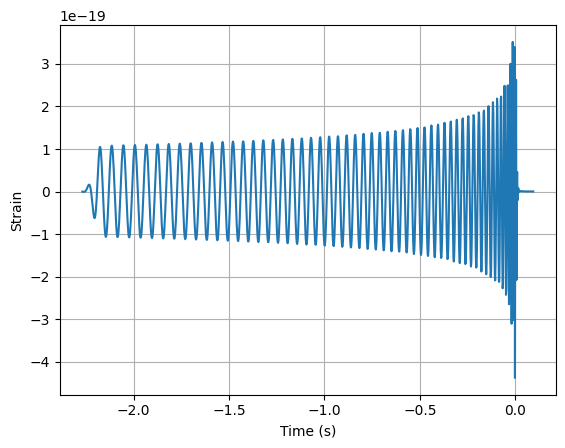

In [3]:

hp, hc = get_td_waveform(approximant='nrsxs',
                                 mass1=30,
                                 mass2=20,
                                 delta_t=1/512,
                                 f_lower=20,
                                 inclination=np.pi/6,
                                 coa_phase=np.pi/4,
                                 distance=1,
                                 sxs_id='SXS:BBH:0001')
plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)')
plt.ylabel('Strain') 
plt.grid()
plt.show()